In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.cluster import KMeans

In [61]:
# Read the CSV file
df_5 = pd.read_csv('/Users/samaardi/Desktop/WBS-Data Science Bootcamp/unsupervised machine learning/3_spotify_5000_songs.csv')

In [62]:
df_5.sample(20)

Unnamed: 0  \
2390        2390   
248          248   
3216        3216   
1581        1581   
3070        3070   
1840        1840   
381          381   
1619        1619   
4630        4630   
4712        4712   
4177        4177   
3133        3133   
4985        4985   
3791        3791   
3716        3716   
1149        1149   
3200        3200   
4047        4047   
5152        5152   
2193        2193   

     name                                                                                                                                                                               \
2390  La Cenerentola / Act 2: "Non più mesta"       ...                                                                                                                                  
248   Cafe de flore                                 ...                                                                                                                                  
3216  En La Cama (feat. Daddy Yankee)               ...                                                                                                                                  
1581  Don't Cha                                     ...                                                                                                                                  
3070  Teenage Crime - Radio Edit                    ...                                                                                                                                  
1840  Air on a G String                             ...                                                                                                                                  
381   Nosebleed                                     ...                                                                                                                                  
1619  If We Ever Meet Again (Featuring Katy Perry)  ...                                                                                                                                  
4630  Rock with you                                 ...                                                                                                                                  
4712  Das alles ändert nichts daran - Radio Version ...                                                                                                                                  
4177  The Forteress                                 ...                                                                                                                                  
3133  Funky Kingston                                ...                                                                                                                                  
4985  A Mí                                          ...                                                                                                                                  
3791  Necrocannibalistic Vomitorium                 ...                                                                                                                                  
3716  To The Depths (In Degradation)                ...                                                                                                                                  
1149  Bennie And The Jets - Remastered 2014         ...                                                                                                                                  
3200  Na De Na                                      ...                                                                                                                                  
4047  Vision in the Shroud                          ...                                                                                                                                  
5152  Symphony No.1 in C minor, Op.68: 1. Un poco s

In [63]:
df_5.columns = df_5.columns.str.strip()

In [64]:
df_5.columns

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')

In [65]:
df_5.drop(columns=['Unnamed: 0', 'type', 'duration_ms', 'id', 'html'], inplace=True)

In [66]:
df_5.set_index(['name', 'artist'], inplace=True)

In [67]:
minmax_scaler = MinMaxScaler()
# we fit and transform our data to minmax scaler to see the correlation after eliminating some columns
df_5_scaled = minmax_scaler.fit_transform(df_5)

In [68]:
df_5_scaled

danceability  \
name                                               artist                                                           
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                          0.680455   
Saudade De Bahia                               ... Antônio Carlos Jobim                                  0.767322   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                      0.880041   
Mulher Eu Sei                                  ... Chico César                                           0.729059   
Rosa Morena                                    ... Kurt Elling                                           0.673216   
...                                                                                                           ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                              0.208893   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                        0.194416   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                     0.061634   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                        0.137539   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                         0.366081   

                                                                                                      energy  \
name                                               artist                                                      
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.25900   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.39900   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.73000   
Mulher Eu Sei                                  ... Chico César                                       0.05020   
Rosa Morena                                    ... Kurt Elling                                       0.11900   
...                                                                                                      ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.06940   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.10100   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 0.00093   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.02080   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.04870   

                                                                                                          key  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      1.000000   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.181818   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.181818   
Mulher Eu Sei                                  ... Chico César                                       0.363636   
Rosa Morena                                    ... Kurt Elling                                       0.545455   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.272727   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.54

In [190]:
seed = 42
max_k = 100
inertia_list=[]

for i in range(10, max_k + 1):
  df_5_kmean = KMeans(n_clusters= i,
                      n_init = "auto",
                    random_state= seed
                    )
  df_5_kmean.fit(df_5_scaled_without_inst_mode_key)
  inertia_list.append(df_5_kmean.inertia_)

/Users/samaardi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


()

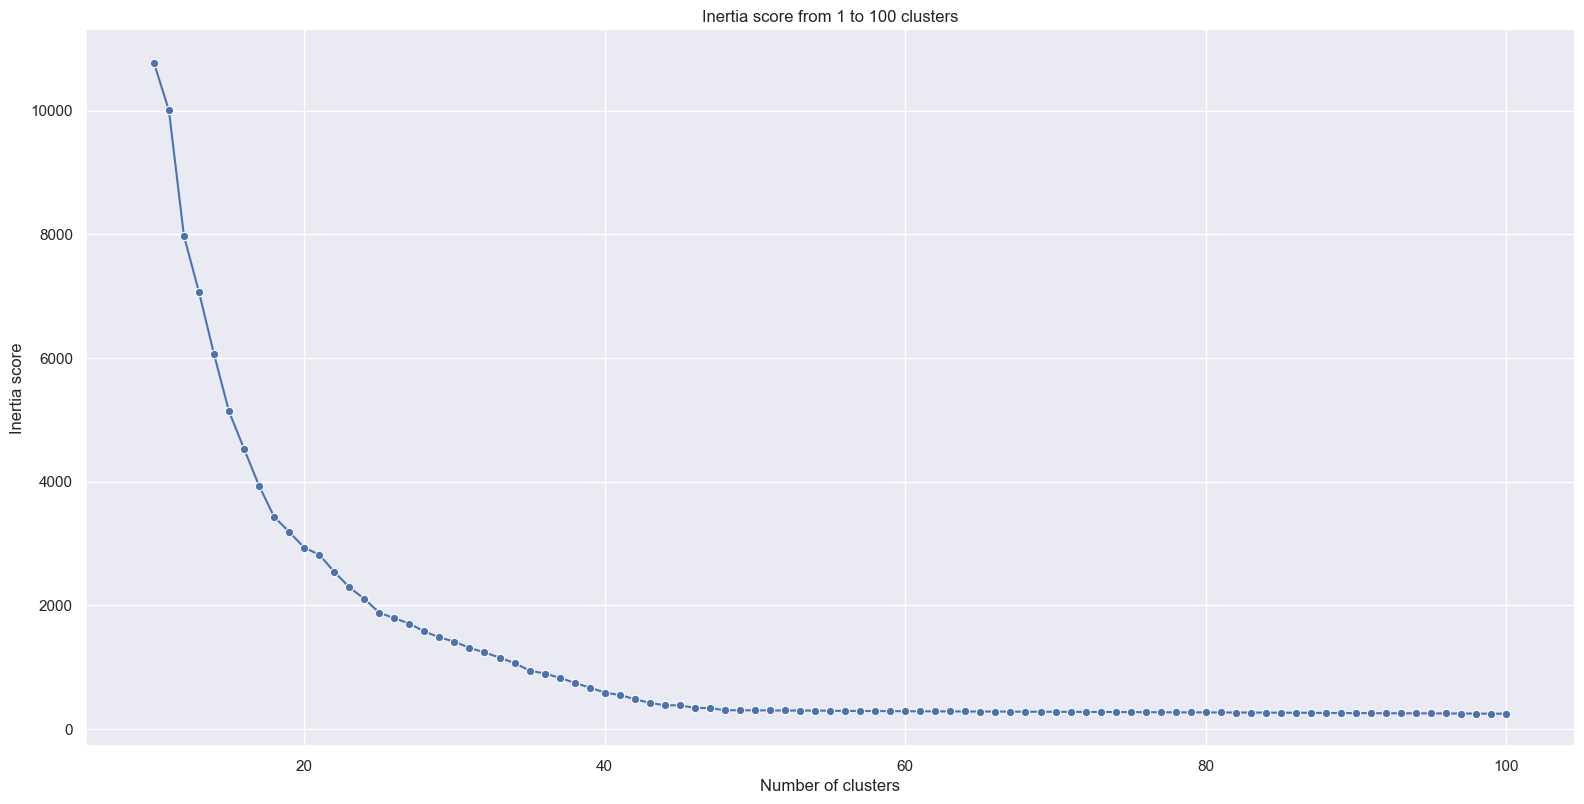

In [191]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')
%matplotlib inline
(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(10, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);()

In [11]:
from sklearn.metrics import silhouette_score

In [189]:
max_k = 100
sil_list = []
for j in range(10, max_k + 1):
  s_kmeans = KMeans(n_clusters=j,
             n_init = "auto",
             random_state=seed)
  s_kmeans.fit(df_5_scaled_without_inst_mode_key)
  labels = s_kmeans.labels_
  score = silhouette_score(df_5_scaled_without_inst_mode_key, labels)
  sil_list.append(score)

/Users/samaardi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


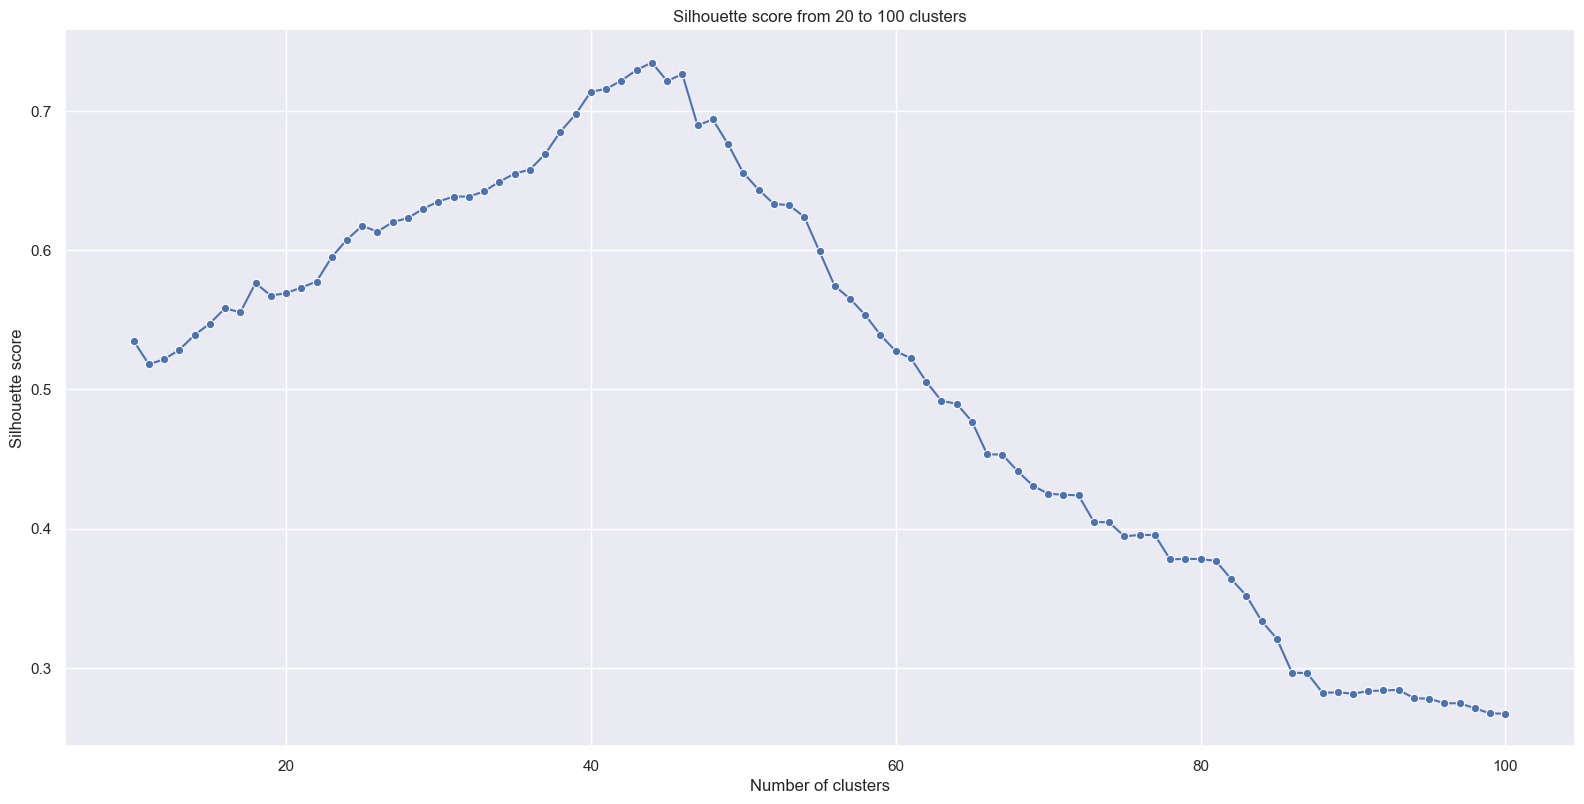

In [192]:
(
sns.relplot(y = sil_list,
            x = range(10, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 20 to {max_k } clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [16]:
from sklearn.decomposition import PCA

In [115]:
df_5_scaled_without_inst = df_5_scaled.drop(columns=['instrumentalness']).copy()

In [120]:
df_5_scaled_without_inst

danceability  \
name                                               artist                                                           
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                          0.680455   
Saudade De Bahia                               ... Antônio Carlos Jobim                                  0.767322   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                      0.880041   
Mulher Eu Sei                                  ... Chico César                                           0.729059   
Rosa Morena                                    ... Kurt Elling                                           0.673216   
...                                                                                                           ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                              0.208893   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                        0.194416   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                     0.061634   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                        0.137539   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                         0.366081   

                                                                                                      energy  \
name                                               artist                                                      
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.25900   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.39900   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.73000   
Mulher Eu Sei                                  ... Chico César                                       0.05020   
Rosa Morena                                    ... Kurt Elling                                       0.11900   
...                                                                                                      ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.06940   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.10100   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 0.00093   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.02080   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.04870   

                                                                                                          key  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      1.000000   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.181818   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.181818   
Mulher Eu Sei                                  ... Chico César                                       0.363636   
Rosa Morena                                    ... Kurt Elling                                       0.545455   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.272727   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.54

In [140]:
df_5_scaled_without_inst_mode = df_5_scaled.drop(columns=['instrumentalness', 'mode']).copy()

In [164]:
df_5_scaled_without_inst_mode_key = df_5_scaled.drop(columns=['instrumentalness', 'mode', 'key']).copy()

In [213]:
my_pca = PCA()

In [214]:
my_pca = PCA()
pca_variance_df = my_pca.fit(df_filtered)

In [215]:
my_pca = PCA()
pca_variance_df = my_pca.fit(df_filtered)
explained_blobs_variance_array = my_pca.explained_variance_ratio_
explained_blobs_variance_array

In [216]:
explained_blobs_variance_array

array([0.51636969, 0.26349369, 0.06080892, 0.05194887, 0.03942834,
       0.03278918, 0.01584041, 0.01316197, 0.00615893])

In [87]:
import numpy as np

/Users/samaardi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


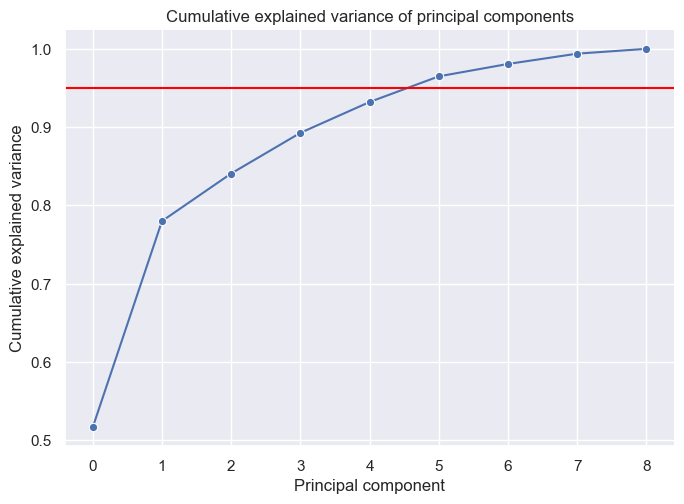

In [218]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = np.arange(len(explained_blobs_variance_array)),  # Set the x-axis to be the principal component index
      y = np.cumsum(explained_blobs_variance_array),  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

In [219]:
# Calculate the cumulative sum
cumulative_sum = np.cumsum(explained_blobs_variance_array)

# Find the index where the cumulative sum reaches 0.95
index = np.searchsorted(cumulative_sum, 0.95)

# Print the number of components required to reach 0.95 variance
print(index + 1)

6


In [230]:
my_pca = PCA(n_components=6)
my_t = my_pca.fit_transform(df_filtered)
my_t

In [231]:
my_t

pca0  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.520374   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.032889   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.049847   
Mulher Eu Sei                                  ... Chico César                                       0.780760   
Rosa Morena                                    ... Kurt Elling                                       0.812833   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.981535   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.921521   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 1.141075   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    1.017119   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.848331   

                                                                                                         pca1  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.085064   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.361663   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.582914   
Mulher Eu Sei                                  ... Chico César                                       0.363739   
Rosa Morena                                    ... Kurt Elling                                       0.238830   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         -0.290250   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   -0.336591   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                -0.406265   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   -0.340587   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    -0.087409   

                                                                                                         pca2  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.444548   
Saudade De Bahia                               ... Antônio Carlos Jobim                             -0.169218   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.007823   
Mulher Eu Sei                                  ... Chico César                                       0.073912   
Rosa Morena                                    ... Kurt Elling                                      -0.095575   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         -0.069635   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   -0.097442   
Schoenberg: 5 Orchestral Pieces, Op

In [109]:
!pip install ydata_profiling

In [110]:
from ydata_profiling import ProfileReport

In [111]:
ProfileReport(df_5_scaled)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [232]:
kmean_best_pca = KMeans(n_clusters=46,
      n_init='auto',
      random_state=seed)
fitted_best_kmean = kmean_best_pca.fit(my_t)

In [233]:
kmean_best_pca = KMeans(n_clusters=46,
      n_init='auto',
      random_state=seed)
fitted_best_kmean = kmean_best_pca.fit(my_t)
fitted_best_kmean.labels_
my_t['cluster'] = fitted_best_kmean.labels_
sns.scatterplot(data=my_t,x=my_t['pca0'],y=my_t['pca1'], hue=my_t['cluster'])

array([29, 24,  5, ...,  0,  0, 15], dtype=int32)

In [234]:
my_t['cluster'] = fitted_best_kmean.labels_

<Axes: xlabel='pca0', ylabel='pca1'>

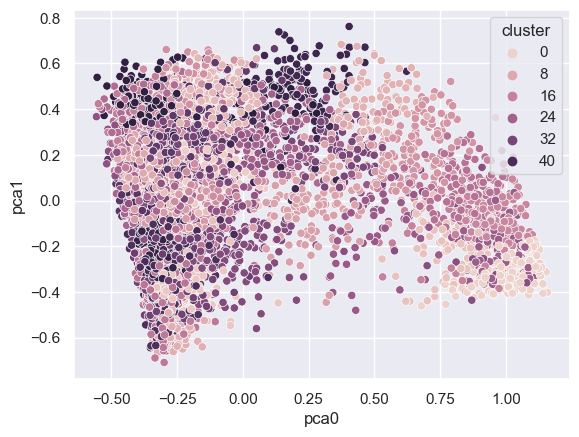

In [235]:
sns.scatterplot(data=my_t,x=my_t['pca0'],y=my_t['pca1'], hue=my_t['cluster'])

In [204]:
df_filtered = df_5_scaled_without_inst_mode_key.loc[~(df_5_scaled_without_inst_mode_key == 0).all(axis=1)]


In [236]:
df_filtered['cluster'] = fitted_best_kmean.labels_

/tmp/ipykernel_12190/2738563621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = fitted_best_kmean.labels_


In [238]:
df_filtered.shape

(5234, 10)

In [240]:
df_filtered.loc[df_filtered['cluster'] == 0, :].sample(20)

danceability  \
name                                               artist                                                           
Jacob and the Stone                            ... Emile Mosseri                                         0.199586   
Symphony No. 3, Op. 36: I. Lento - Sostenuto Tr... Henryk Górecki                                        0.086867   
Piano Sonata No. 13 in A Major, D. 664: II. And... Franz Schubert                                        0.381593   
Dagdraumur                                     ... Eydís Evensen                                         0.290589   
Yanagiwara                                     ... Hirotaka Shirotsubaki                                 0.133402   
Giordano: Andrea Chénier, Act 3: "La mamma mort... Umberto Giordano                                      0.225440   
2 Stücke, Op. 16: I. Romanze (Quasi adagio)    ... Leone Sinigaglia                                      0.189245   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                        0.137539   
Lizard Point - Remastered 2004                 ... Brian Eno                                             0.140641   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                              0.208893   
unother                                        ... Terekke                                               0.253361   
Air on the G String from Orchestral Suite No. 3... Johann Sebastian Bach                                 0.325750   
Sadness - Carlos Cipa Rework                   ... Masayoshi Fujita                                      0.163392   
The Unquestioned Answer                        ... Laurie Spiegel                                        0.180972   
I Will                                         ... Brian McBride                                         0.112720   
Bylur                                          ... Eydís Evensen                                         0.190279   
In Another Life                                ... Dirk Maassen                                          0.118925   
Home                                           ... Zimerman Orchestra                                    0.304033   
Concierto de Aranjuez for Guitar and Orchestra:... Joaquín Rodrigo                                       0.261634   
Piano Aquieu                                   ... Stars Of The Lid                                      0.118925   

                                                                                                      energy  \
name                                               artist                                                      
Jacob and the Stone                            ... Emile Mosseri                                     0.17100   
Symphony No. 3, Op. 36: I. Lento - Sostenuto Tr... Henryk Górecki                                    0.12400   
Piano Sonata No. 13 in A Major, D. 664: II. And... Franz Schubert                                    0.00245   
Dagdraumur                                     ... Eydís Evensen                                     0.04450   
Yanagiwara                                     ... Hirotaka Shirotsubaki                             0.07070   
Giordano: Andrea Chénier, Act 3: "La mamma mort... Umberto Giordano                                  0.13400   
2 Stücke, Op. 16: I. Romanze (Quasi adagio)    ... Leone Sinigaglia                                  0.03120   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.02080   
Lizard Point - Remastered 2004                 ... Brian Eno                                         0.01080   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.06940   
unother                                        ... Terekke                                           0.08620   
Air on the G String from Orchestral Suite No. 3... Johann Sebastian Ba

In [241]:
df_filtered.loc[df_filtered['cluster'] == 10, :].sample(20)

danceability  \
name                                               artist                                                           
This Is A Move - Live                          ... Tasha Cobbs Leonard                                   0.253361   
Ask For Rain                                   ... Gene Moore                                            0.331954   
In My Blood / Swan Lake                        ... The Piano Guys                                        0.341262   
River Deep - Mountain High                     ... Ike & Tina Turner                                     0.402275   
Wonderful! Wonderful! (with Ray Conniff & His O... Johnny Mathis                                         0.258532   
Espinàs                                        ... Vàlius                                                0.274043   
A Love Supreme, Pt. II - Resolution            ... John Coltrane                                         0.352637   
110                                            ... Capital Bra                                           0.496381   
Layla                                          ... Derek & The Dominos                                   0.417787   
Kiss from a Rose                               ... Seal                                                  0.603930   
Alone                                          ... Heart                                                 0.432265   
Lenin                                          ... Vàlius                                                0.410548   
Deliverance                                    ... Merry Clayton                                         0.534643   
Victory                                        ... The Clark Sisters                                     0.377456   
Weinst Du                                      ... Echt                                                  0.399173   
Always On My Mind                              ... Elvis Presley                                         0.370217   
Permanent Vacation                             ... Alba Lua                                              0.271975   
Wichita Lineman - Remastered 2001              ... Glen Campbell                                         0.198552   
Waddlin Around                                 ... The King Khan & BBQ Show                              0.199586   
Stormy Weather                                 ... Etta James                                            0.270941   

                                                                                                     energy  \
name                                               artist                                                     
This Is A Move - Live                          ... Tasha Cobbs Leonard                                0.723   
Ask For Rain                                   ... Gene Moore                                         0.486   
In My Blood / Swan Lake                        ... The Piano Guys                                     0.528   
River Deep - Mountain High                     ... Ike & Tina Turner                                  0.745   
Wonderful! Wonderful! (with Ray Conniff & His O... Johnny Mathis                                      0.398   
Espinàs                                        ... Vàlius                                             0.811   
A Love Supreme, Pt. II - Resolution            ... John Coltrane                                      0.570   
110                                            ... Capital Bra                                        0.749   
Layla                                          ... Derek & The Dominos                                0.902   
Kiss from a Rose                               ... Seal                                               0.533   
Alone                                          ... Heart                                              0.452   
Lenin                                          ... Vàlius                          

In [243]:
df_filtered.drop(columns=['cluster'], inplace=True)

KeyError: "['cluster'] not found in axis"

In [248]:
my_dv = PCA(n_components=1)
dance_val = my_dv.fit_transform(df_filtered[['danceability', 'valence']])
dance_val

pca0
name                                               artist                                                    
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     -0.023528
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.345892
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.586381
Mulher Eu Sei                                  ... Chico César                                       0.184377
Rosa Morena                                    ... Kurt Elling                                       0.051264
...                                                                                                       ...
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         -0.497485
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   -0.530654
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                -0.609269
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   -0.544513
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    -0.251141

[5234 rows x 1 columns]

In [249]:
my_dv_2 = PCA(n_components=1)
loud_energy_acc = my_dv_2.fit_transform(df_filtered[['loudness', 'energy', 'acousticness']])
loud_energy_acc

pca0
name                                               artist                                                    
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.564666
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.106960
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.085583
Mulher Eu Sei                                  ... Chico César                                       0.849591
Rosa Morena                                    ... Kurt Elling                                       0.841602
...                                                                                                       ...
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.882772
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.810967
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 1.007201
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.903207
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.794363

[5234 rows x 1 columns]

In [252]:
df_filtered['danceability_valence'] = dance_val

/tmp/ipykernel_12190/1798411962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['danceability_valence'] = dance_val


In [250]:
df_filtered['acoustic_loudness_energy'] = loud_energy_acc

/tmp/ipykernel_12190/4133803689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['acoustic_loudness_energy'] = loud_energy_acc


In [254]:
df_filtered.drop(columns=['danceability', 'valence', 'energy', 'acousticness', 'loudness'], inplace=True)

/tmp/ipykernel_12190/2457703881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['danceability', 'valence', 'energy', 'acousticness', 'loudness'], inplace=True)


In [255]:
df_filtered

speechiness  \
name                                               artist                                                          
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                         0.076797   
Saudade De Bahia                               ... Antônio Carlos Jobim                                 0.037691   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                     0.377996   
Mulher Eu Sei                                  ... Chico César                                          0.051307   
Rosa Morena                                    ... Kurt Elling                                          0.041394   
...                                                                                                          ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                             0.051525   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                       0.048148   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                    0.047277   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                       0.045643   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                        0.035185   

                                                                                                     liveness  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.987842   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.108409   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.125633   
Mulher Eu Sei                                  ... Chico César                                       0.391084   
Rosa Morena                                    ... Kurt Elling                                       0.105370   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.084296   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.070314   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 0.078217   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.112462   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.287741   

                                                                                                        tempo  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.515800   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.584322   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.437862   
Mulher Eu Sei                                  ... Chico César                                       0.499098   
Rosa Morena                                    ... Kurt Elling                                       0.565171   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.410795   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.38

In [256]:
df_filtered.columns

Index(['speechiness', 'liveness', 'tempo', 'time_signature',
       'acoustic_loudness_energy', 'danceability_valence'],
      dtype='object')

In [ ]:
my_pca = PCA(n_components=4)
my_t = my_pca.fit_transform(df_filtered)
my_t

In [302]:
my_t

pca0  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.517147   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.031652   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.049687   
Mulher Eu Sei                                  ... Chico César                                       0.779008   
Rosa Morena                                    ... Kurt Elling                                       0.810276   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.981326   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.921251   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 1.139691   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    1.016851   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.847489   

                                                                                                         pca1  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.078617   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.364625   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.586627   
Mulher Eu Sei                                  ... Chico César                                       0.361657   
Rosa Morena                                    ... Kurt Elling                                       0.238812   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         -0.286168   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   -0.333734   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                -0.376196   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   -0.328152   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    -0.079941   

                                                                                                         pca2  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.828459   
Saudade De Bahia                               ... Antônio Carlos Jobim                             -0.067785   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.041842   
Mulher Eu Sei                                  ... Chico César                                       0.251758   
Rosa Morena                                    ... Kurt Elling                                      -0.035169   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         -0.066282   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   -0.085344   
Schoenberg: 5 Orchestral Pieces, Op

In [303]:
seed = 42
max_k = 100
inertia_list=[]

for i in range(10, max_k + 1):
  df_5_kmean = KMeans(n_clusters= i,
                      n_init = "auto",
                    random_state= seed
                    )
  df_5_kmean.fit(my_t)
  inertia_list.append(df_5_kmean.inertia_)

/Users/samaardi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


()

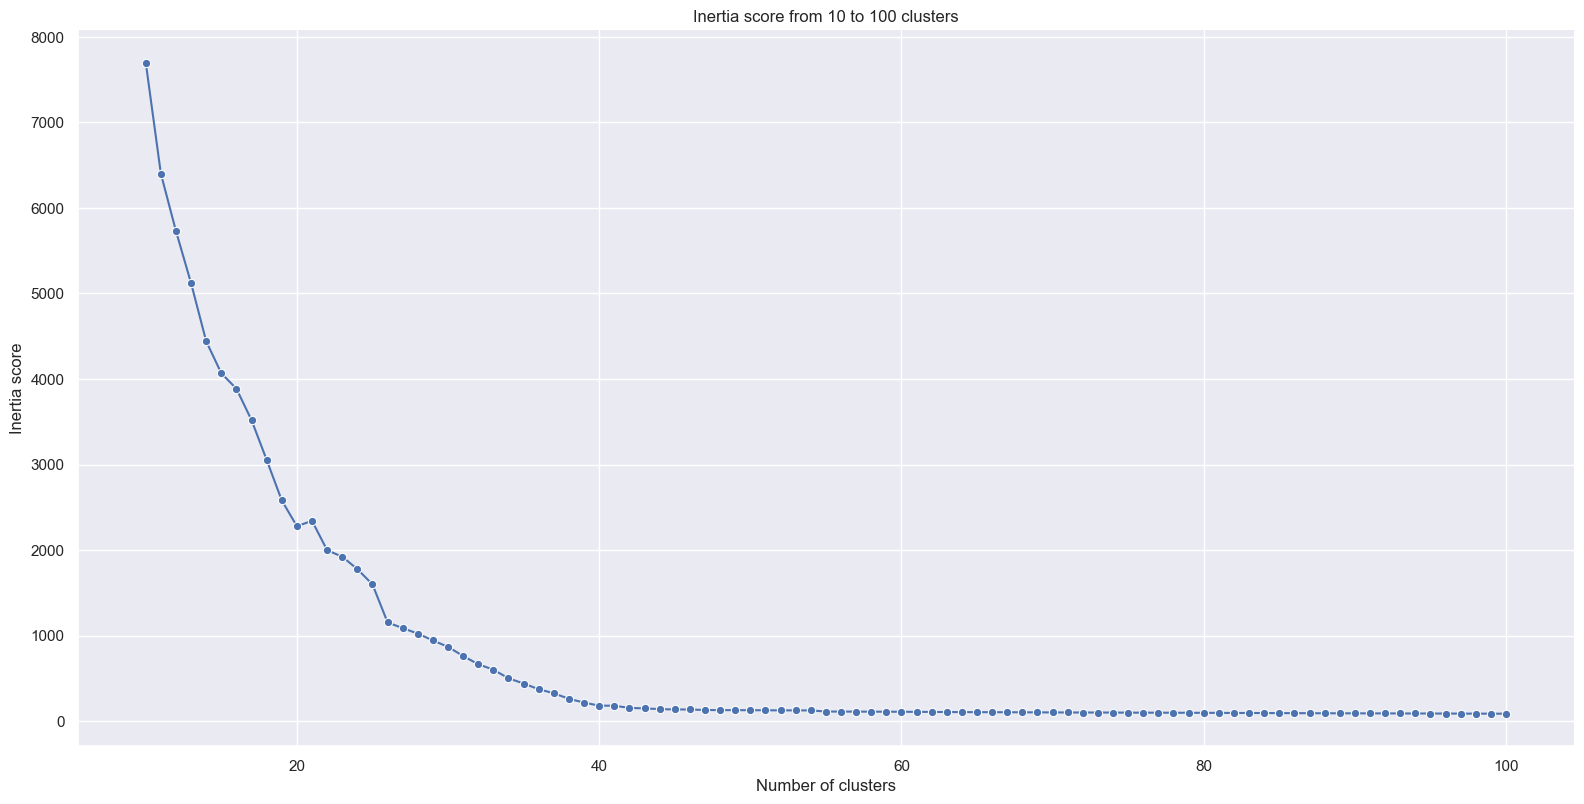

In [304]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')
%matplotlib inline
(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(10, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 10 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);()

In [305]:
max_k = 100
sil_list = []
for j in range(10, max_k + 1):
  s_kmeans = KMeans(n_clusters=j,
             n_init = "auto",
             random_state=seed)
  s_kmeans.fit(my_t)
  labels = s_kmeans.labels_
  score = silhouette_score(my_t, labels)
  sil_list.append(score)

/Users/samaardi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


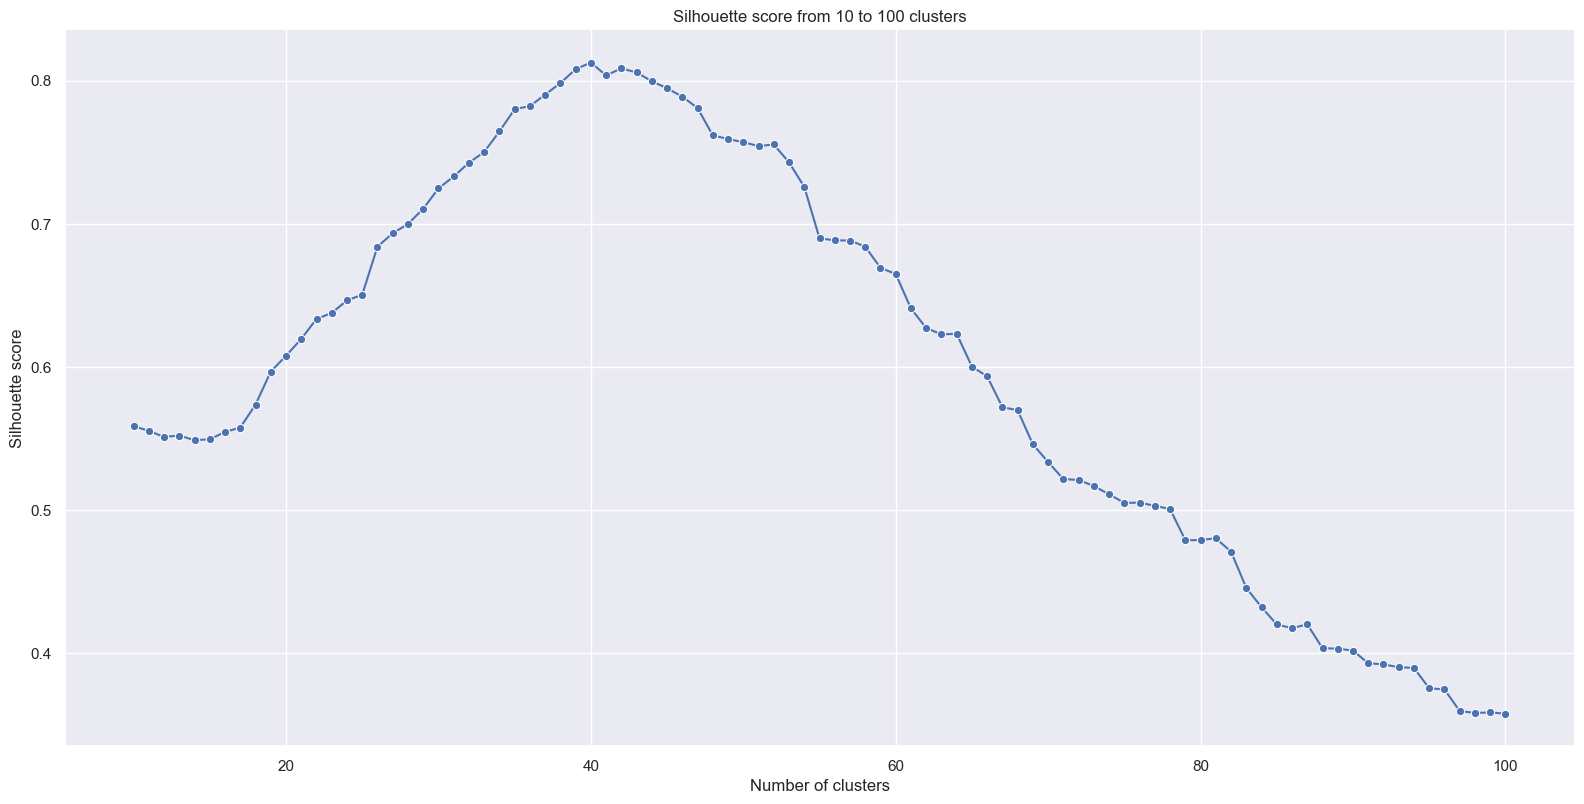

In [306]:
(
sns.relplot(y = sil_list,
            x = range(10, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 10 to {max_k } clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

In [262]:
my_pca = PCA()
pca_variance_df = my_pca.fit(df_filtered)
explained_blobs_variance_array = my_pca.explained_variance_ratio_
explained_blobs_variance_array

array([0.57072432, 0.28931315, 0.06120499, 0.04620093, 0.01766106,
       0.01489556])

/Users/samaardi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


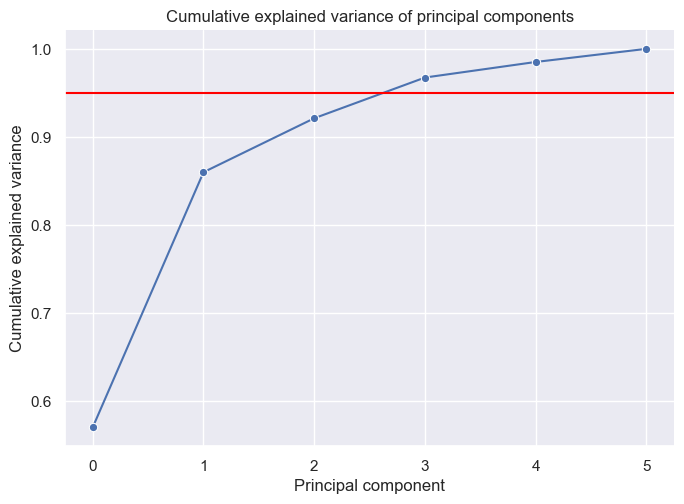

In [263]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = np.arange(len(explained_blobs_variance_array)),  # Set the x-axis to be the principal component index
      y = np.cumsum(explained_blobs_variance_array),  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title = "Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red');

In [264]:
# Calculate the cumulative sum
cumulative_sum = np.cumsum(explained_blobs_variance_array)

# Find the index where the cumulative sum reaches 0.95
index = np.searchsorted(cumulative_sum, 0.95)

# Print the number of components required to reach 0.95 variance
print(index + 1)

4


In [267]:
my_pca = PCA(n_components=4)
my_t = my_pca.fit_transform(df_filtered)
my_t

pca0  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.517147   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.031652   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.049687   
Mulher Eu Sei                                  ... Chico César                                       0.779008   
Rosa Morena                                    ... Kurt Elling                                       0.810276   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.981326   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.921251   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 1.139691   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    1.016851   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.847489   

                                                                                                         pca1  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.078617   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.364625   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.586627   
Mulher Eu Sei                                  ... Chico César                                       0.361657   
Rosa Morena                                    ... Kurt Elling                                       0.238812   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         -0.286168   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   -0.333734   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                -0.376196   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                   -0.328152   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                    -0.079941   

                                                                                                         pca2  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.828459   
Saudade De Bahia                               ... Antônio Carlos Jobim                             -0.067785   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.041842   
Mulher Eu Sei                                  ... Chico César                                       0.251758   
Rosa Morena                                    ... Kurt Elling                                      -0.035169   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                         -0.066282   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                   -0.085344   
Schoenberg: 5 Orchestral Pieces, Op

In [295]:
df_filtered.drop(columns=['cluster'], inplace=True)

KeyError: "['cluster'] not found in axis"

<Axes: xlabel='pca0', ylabel='pca1'>

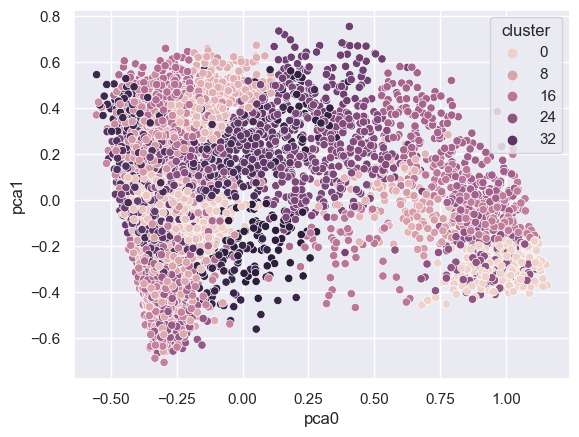

In [301]:
kmean_best_pca = KMeans(n_clusters=40,
      n_init='auto',
      random_state=seed)
fitted_best_kmean = kmean_best_pca.fit(my_t)
fitted_best_kmean.labels_
my_t['cluster'] = fitted_best_kmean.labels_
sns.scatterplot(data=my_t,x=my_t['pca0'],y=my_t['pca1'], hue=my_t['cluster'])

In [307]:
df_filtered['cluster'] = fitted_best_kmean.labels_

/tmp/ipykernel_12190/2738563621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster'] = fitted_best_kmean.labels_


In [340]:
#sleeping
df_filtered.loc[df_filtered['cluster'] == 0, :].sample(20)

speechiness  \
name                                               artist                                                          
Night                                          ... Ludovico Einaudi                                     0.040087   
Angle of List                                  ... Loscil                                               0.049564   
Piano Sonata No. 14 (quasi una Fantasia) in C-S... Ludwig van Beethoven                                 0.045861   
Symphony No.1 in C minor, Op.68: 1. Un poco sos... Johannes Brahms                                      0.038235   
A Tree & A River                               ... Henry Smith                                          0.047277   
Sugar Land                                     ... Davide Locatelli                                     0.041285   
Flower Through Concrete                        ... Chloe Flower                                         0.040414   
unother                                        ... Terekke                                              0.045969   
Introspection (Edit)                           ... Laraaji                                              0.035839   
A Dante Symphony, S.109: 1. Inferno            ... Franz Liszt                                          0.045969   
Wind On Wind                                   ... Robert Fripp                                         0.047712   
Moon River                                     ... 2CELLOS                                              0.047930   
May it Be                                      ... 2CELLOS                                              0.050109   
My Edward and I (feat. Jack Liebeck)           ... Dario Marianelli                                     0.051852   
Sigur 1 (Untitled)                             ... Sigur Rós                                            0.036166   
Juli, Juli                                     ... Dirk Maassen                                         0.051307   
Jimmy V                                        ... Mary Lattimore                                       0.048802   
Piano Aquieu                                   ... Stars Of The Lid                                     0.051307   
A Meaningful Moment Through a Meaning(less) Pro... Stars Of The Lid                                     0.047059   
Adès: Tevot, Op. 24                            ... Thomas Adès                                          0.038998   

                                                                                                     liveness  \
name                                               artist                                                       
Night                                          ... Ludovico Einaudi                                  0.101317   
Angle of List                                  ... Loscil                                            0.096251   
Piano Sonata No. 14 (quasi una Fantasia) in C-S... Ludwig van Beethoven                              0.129686   
Symphony No.1 in C minor, Op.68: 1. Un poco sos... Johannes Brahms                                   0.161094   
A Tree & A River                               ... Henry Smith                                       0.096859   
Sugar Land                                     ... Davide Locatelli                                  0.129686   
Flower Through Concrete                        ... Chloe Flower                                      0.106383   
unother                                        ... Terekke                                           0.093212   
Introspection (Edit)                           ... Laraaji                                           0.070821   
A Dante Symphony, S.109: 1. Inferno            ... Franz Liszt                                       0.086829   
Wind On Wind                                   ... Robert Fripp                                      0.086018   
Moon River                                     ... 2CELLOS                     

In [276]:
#blues
df_filtered.loc[df_filtered['cluster'] == 12, :].sample(20)

speechiness  \
name                                               artist                                                          
Weather With You                               ... Crowded House                                        0.030392   
You Can Get It If You Really Want              ... Jimmy Cliff                                          0.061874   
Break Ya Neck                                  ... Busta Rhymes                                         0.263617   
Juicy - 2005 Remaster                          ... The Notorious B.I.G.                                 0.275599   
No Diggity                                     ... Blackstreet                                          0.225490   
Blue Suede Shoes                               ... Carl Perkins                                         0.035185   
Obsesión                                       ... Maluma                                               0.117647   
Sin Pijama                                     ... Becky G                                              0.050545   
Jamming                                        ... Bob Marley & The Wailers                             0.325708   
When the Going Gets Tough, The Tough Get Going ... Billy Ocean                                          0.051525   
Just Can't Get Enough                          ... Depeche Mode                                         0.038453   
How Long                                       ... Charlie Puth                                         0.084749   
No Quiere Novio (remix) [feat. Nejo & Tego Cald... DJ Nelson                                            0.234205   
Magic                                          ... Chucho                                               0.033660   
A Un Paso De La Luna                           ... Ana Mena                                             0.057843   
I Can Dream About You                          ... Dan Hartman                                          0.060349   
Soul Man                                       ... Sam & Dave                                           0.037364   
Crank That (Soulja Boy)                        ... Soulja Boy                                           0.086166   
Having A Party                                 ... Lee "Scratch" Perry                                  0.112200   
Walking on Broken Glass                        ... Annie Lennox                                         0.030610   

                                                                                                     liveness  \
name                                               artist                                                       
Weather With You                               ... Crowded House                                     0.216819   
You Can Get It If You Really Want              ... Jimmy Cliff                                       0.077204   
Break Ya Neck                                  ... Busta Rhymes                                      0.062209   
Juicy - 2005 Remaster                          ... The Notorious B.I.G.                              0.181358   
No Diggity                                     ... Blackstreet                                       0.134752   
Blue Suede Shoes                               ... Carl Perkins                                      0.156028   
Obsesión                                       ... Maluma                                            0.094833   
Sin Pijama                                     ... Becky G                                           0.105370   
Jamming                                        ... Bob Marley & The Wailers                          0.131712   
When the Going Gets Tough, The Tough Get Going ... Billy Ocean                                       0.322188   
Just Can't Get Enough                          ... Depeche Mode                                      0.185410   
How Long                                       ... Charlie Puth                

In [277]:
#happy
df_filtered.loc[df_filtered['cluster'] == 33, :].sample(20)

speechiness  \
name                                               artist                                                          
I'll Stand by You                              ... Pretenders                                           0.033224   
Oats In The Water                              ... Ben Howard                                           0.031481   
Easy                                           ... Commodores                                           0.034205   
I Don’t Wanna Live Forever (Fifty Shades Darker... ZAYN                                                 0.063725   
Swang                                          ... Rae Sremmurd                                         0.063290   
Love Me Like You Do - From "Fifty Shades Of Gre... Ellie Goulding                                       0.058932   
Sonnentanz                                     ... Klangkarussell                                       0.168845   
Circle of Life - From "The Lion King"/Soundtrac... Elton John                                           0.036057   
Waddlin Around                                 ... The King Khan & BBQ Show                             0.060893   
Victory                                        ... The Clark Sisters                                    0.107625   
Tiny Dancer                                    ... Elton John                                           0.030283   
Grace                                          ... Kelly Price                                          0.051198   
One                                            ... U2                                                   0.040196   
Tu Manes                                       ... Aias                                                 0.040959   
Lila Wolken                                    ... Marteria                                             0.057734   
Flashlight - From "Pitch Perfect 2" Soundtrack ... Jessie J                                             0.055011   
Still                                          ... Brian Courtney Wilson                                0.080937   
Love Someone                                   ... Lukas Graham                                         0.055011   
Amazed                                         ... Lonestar                                             0.031373   
When You Say Nothing At All                    ... Ronan Keating                                        0.026797   

                                                                                                     liveness  \
name                                               artist                                                       
I'll Stand by You                              ... Pretenders                                        0.076393   
Oats In The Water                              ... Ben Howard                                        0.190476   
Easy                                           ... Commodores                                        0.075279   
I Don’t Wanna Live Forever (Fifty Shades Darker... ZAYN                                              0.329281   
Swang                                          ... Rae Sremmurd                                      0.101317   
Love Me Like You Do - From "Fifty Shades Of Gre... Ellie Goulding                                    0.128673   
Sonnentanz                                     ... Klangkarussell                                    0.088349   
Circle of Life - From "The Lion King"/Soundtrac... Elton John                                        0.107396   
Waddlin Around                                 ... The King Khan & BBQ Show                          0.268490   
Victory                                        ... The Clark Sisters                                 0.331307   
Tiny Dancer                                    ... Elton John                                        0.149949   
Grace                                          ... Kelly Price                 

In [343]:
#spanish bar jazz
df_filtered.loc[df_filtered['cluster'] == 26, :].sample(20)

speechiness  \
name                                               artist                                                          
All of You (feat. John Coltrane, Red Garland, P... Miles Davis                                          0.046187   
Let's Stay Together                            ... Al Green                                             0.056863   
There's No Business Like Show Business         ... Sonny Rollins                                        0.040414   
Sampa                                          ... Caetano Veloso                                       0.072113   
Felicia and Bianca                             ... Toots Thielemans                                     0.051416   
Just A Gigolo - Remastered                     ... Louis Prima                                          0.102941   
Serenade To A Soul Sister - Remastered         ... Horace Silver                                        0.033224   
Bedingungslos (Single Mix)                     ... Kate & Ben                                           0.036601   
Blueberry Hill                                 ... Fats Domino                                          0.029521   
Here You Come Again                            ... Dolly Parton                                         0.042593   
Hallelujah, I Love Her So                      ... Ray Charles                                          0.184096   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                                          0.035839   
Brigas, Nunca Mais                             ... João Gilberto                                        0.036166   
Moondance - 2013 Remaster                      ... Van Morrison                                         0.036928   
7 rings                                        ... Ariana Grande                                        0.363834   
Venus - Bonus Track                            ... Frankie Avalon                                       0.032244   
On The Sunny Side Of The Street                ... Dizzy Gillespie                                      0.063290   
Love For Sale                                  ... Anita O'Day                                          0.080065   
All I Have to Do Is Dream                      ... The Everly Brothers                                  0.029194   
California Dreamin' - Remastered               ... Bobby Womack                                         0.033442   

                                                                                                     liveness  \
name                                               artist                                                       
All of You (feat. John Coltrane, Red Garland, P... Miles Davis                                       0.186424   
Let's Stay Together                            ... Al Green                                          0.054914   
There's No Business Like Show Business         ... Sonny Rollins                                     0.106383   
Sampa                                          ... Caetano Veloso                                    0.147923   
Felicia and Bianca                             ... Toots Thielemans                                  0.103343   
Just A Gigolo - Remastered                     ... Louis Prima                                       0.057244   
Serenade To A Soul Sister - Remastered         ... Horace Silver                                     0.091489   
Bedingungslos (Single Mix)                     ... Kate & Ben                                        0.094428   
Blueberry Hill                                 ... Fats Domino                                       0.158055   
Here You Come Again                            ... Dolly Parton                                      0.039716   
Hallelujah, I Love Her So                      ... Ray Charles                                       0.157042   
Freddie Freeloader (feat. John Coltrane, Cannon... Miles Davis                 

In [341]:
# summer festival
df_filtered.loc[df_filtered['cluster'] == 21, :].sample(20)

speechiness  \
name                                               artist                                                          
River Flows in You                             ... Yiruma                                               0.058932   
Shape of You                                   ... Henry Smith                                          0.043682   
Bang Bang (My Baby Shot Me Down) - From "Kill B... Thibault Cauvin                                      0.051634   
Strange Meadow Lark                            ... The Dave Brubeck Quartet                             0.046078   
Acabou Chorare                                 ... Sílvia Pérez Cruz                                    0.059150   
You Don't Know What Love Is                    ... Dinah Washington                                     0.055882   
Get Out Of Town                                ... Caetano Veloso                                       0.066885   
Dancing In The Moonlight                       ... Elin Porsinger                                       0.067538   
Partita No. 6 in E Minor, BWV 830: IV. Air     ... Johann Sebastian Bach                                0.043791   
Ambre                                          ... Nils Frahm                                           0.049129   
Desafinado                                     ... Stan Getz                                            0.070697   
My Funny Valentine                             ... Chet Baker                                           0.041612   
Symphony                                       ... RPM (Relaxing Piano Music)                           0.041394   
Symphony No. 15 in A Major, Op. 141: I. Allegre... Dmitri Shostakovich                                  0.046514   
Reborn                                         ... Alexis Ffrench                                       0.034532   
Symphony No.102 In B Flat Major, Hob.I:102: 1. ... Franz Joseph Haydn                                   0.041176   
Since I Fell For You - Rudy Van Gelder Edition ... Lee Morgan                                           0.041285   
Bizet: Carmen, Act 1: "L'amour est un oiseau re... Georges Bizet                                        0.064270   
Halo                                           ... Henry Smith                                          0.043573   
I Will Always Love You                         ... Dolly Parton                                         0.036492   

                                                                                                     liveness  \
name                                               artist                                                       
River Flows in You                             ... Yiruma                                            0.091185   
Shape of You                                   ... Henry Smith                                       0.113475   
Bang Bang (My Baby Shot Me Down) - From "Kill B... Thibault Cauvin                                   0.097467   
Strange Meadow Lark                            ... The Dave Brubeck Quartet                          0.281662   
Acabou Chorare                                 ... Sílvia Pérez Cruz                                 0.110436   
You Don't Know What Love Is                    ... Dinah Washington                                  0.091793   
Get Out Of Town                                ... Caetano Veloso                                    0.105370   
Dancing In The Moonlight                       ... Elin Porsinger                                    0.102330   
Partita No. 6 in E Minor, BWV 830: IV. Air     ... Johann Sebastian Bach                             0.130699   
Ambre                                          ... Nils Frahm                                        0.104357   
Desafinado                                     ... Stan Getz                                         0.108409   
My Funny Valentine                             ... Chet Baker                  

In [281]:
# American movies 🍿 / country music
df_filtered.loc[df_filtered['cluster'] == 39, :].sample(20)

speechiness  \
name                                               artist                                                          
It's Only Make Believe - Single Version        ... Conway Twitty                                        0.041830   
Mr. Tambourine Man                             ... Bob Dylan                                            0.073638   
I Have Nothing - Film Version                  ... Whitney Houston                                      0.037255   
The Rite of Spring: Part Two: The Sacrifice: Sa... Igor Stravinsky                                      0.113290   
Alone                                          ... Heart                                                0.038780   
Top Of The World                               ... Carpenters                                           0.041939   
Lay, Lady, Lay                                 ... Bob Dylan                                            0.049455   
Sonho Meu                                      ... Dona Ivone Lara                                      0.044444   
Ponta de Areia                                 ... Wayne Shorter                                        0.035403   
Whole Lot of Shakin' Going On                  ... Jerry Lee Lewis                                      0.035948   
Wie weit ist vorbei                            ... Rosenstolz                                           0.033333   
Your Song                                      ... Elton John                                           0.032462   
All the Things You Are                         ... Oscar Peterson Trio                                  0.038453   
Morning Has Broken                             ... Yusuf / Cat Stevens                                  0.033987   
Stars Fell On Alabama                          ... Toots Thielemans                                     0.068301   
Blue Skies                                     ... Ella Fitzgerald                                      0.052614   
Imprimis Obscurity                             ... Broken Hope                                          0.082898   
It's Real                                      ... Real Estate                                          0.033660   
Where Do You Go To (My Lovely)                 ... Peter Sarstedt                                       0.037582   
Adrift Together                                ... Subsona                                              0.032135   

                                                                                                     liveness  \
name                                               artist                                                       
It's Only Make Believe - Single Version        ... Conway Twitty                                     0.128673   
Mr. Tambourine Man                             ... Bob Dylan                                         0.383992   
I Have Nothing - Film Version                  ... Whitney Houston                                   0.086322   
The Rite of Spring: Part Two: The Sacrifice: Sa... Igor Stravinsky                                   0.156028   
Alone                                          ... Heart                                             0.097163   
Top Of The World                               ... Carpenters                                        0.100405   
Lay, Lady, Lay                                 ... Bob Dylan                                         0.132725   
Sonho Meu                                      ... Dona Ivone Lara                                   0.124620   
Ponta de Areia                                 ... Wayne Shorter                                     0.077913   
Whole Lot of Shakin' Going On                  ... Jerry Lee Lewis                                   0.190476   
Wie weit ist vorbei                            ... Rosenstolz                                        0.147923   
Your Song                                      ... Elton John                  

In [285]:
# Rock bar
df_filtered.loc[df_filtered['cluster'] == 2, :].sample(20)

speechiness  \
name                                               artist                                                          
Bleeding                                       ... Desultory                                            0.113290   
Bleeding Shrines of Stone                      ... Liers In Wait                                        0.128540   
Defiling the Gates of Ishtar                   ... Nile                                                 0.103813   
Icons of Evil                                  ... Vital Remains                                        0.137255   
Cthulhu                                        ... Therion                                              0.046078   
Labyrinth                                      ... Sacrificium                                          0.076906   
I'm in Pain                                    ... Obituary                                             0.084423   
Eclipse into Eternity                          ... Oppressor                                            0.172113   
Subconscious Release                           ... Desecrator                                           0.067320   
Tornar a estar bé                              ... Súper Gegant                                         0.058279   
As I Behold I Despise                          ... Demigod                                              0.094880   
Dementia                                       ... Brutal Truth                                         0.161220   
Battle ground                                  ... Vital Remains                                        0.198257   
Kingdom Gone                                   ... At The Gates                                         0.169935   
Creative Killings                              ... Sinister                                             0.323529   
The Deceived Ones                              ... Opprobrium                                           0.156863   
Sunrise Over Locus Mortis - Studio             ... Darkthrone                                           0.107625   
Latitudinarian                                 ... Master                                               0.058932   
Spiritual Immolation                           ... Sinister                                             0.176471   
Before the Creation of Time - remastered       ... Unleashed                                            0.091830   

                                                                                                     liveness  \
name                                               artist                                                       
Bleeding                                       ... Desultory                                         0.339412   
Bleeding Shrines of Stone                      ... Liers In Wait                                     0.207700   
Defiling the Gates of Ishtar                   ... Nile                                              0.500507   
Icons of Evil                                  ... Vital Remains                                     0.376900   
Cthulhu                                        ... Therion                                           0.352584   
Labyrinth                                      ... Sacrificium                                       0.459980   
I'm in Pain                                    ... Obituary                                          0.249240   
Eclipse into Eternity                          ... Oppressor                                         0.300912   
Subconscious Release                           ... Desecrator                                        0.408308   
Tornar a estar bé                              ... Súper Gegant                                      0.270517   
As I Behold I Despise                          ... Demigod                                           0.447822   
Dementia                                       ... Brutal Truth                

In [286]:
df_filtered.loc[df_filtered['cluster'] == 9, :].sample(20)

speechiness  \
name                                               artist                                                          
We Are Your Friends - Justice Vs Simian        ... Justice                                              0.129630   
They Are the Children of the Underworld        ... Deicide                                              0.055991   
Andas En Mi Cabeza                             ... Chino & Nacho                                        0.141612   
Head On                                        ... The Jesus and Mary Chain                             0.035294   
Who Do You Love                                ... The Chainsmokers                                     0.048693   
Walk Away                                      ... Franz Ferdinand                                      0.037908   
The Black Dahlia                               ... Lamb of God                                          0.113290   
You Can't Change Me                            ... Don Diablo                                           0.059150   
Till The Sun Comes Up                          ... Firebeatz                                            0.040305   
Latch                                          ... Disclosure                                           0.181917   
Parabens                                       ... Marcos Valle                                         0.046187   
We Fly High                                    ... Jim Jones                                            0.321351   
Low (feat. T-Pain)                             ... Flo Rida                                             0.064597   
Booty Bounce - Radio Edit                      ... Tujamo                                               0.038453   
Drinking from the Bottle (feat. Tinie Tempah)  ... Calvin Harris                                        0.055991   
Cola                                           ... CamelPhat                                            0.035403   
Born in the U.S.A.                             ... Bruce Springsteen                                    0.066449   
Spectrum                                       ... Zedd                                                 0.037691   
Born to Run                                    ... Bruce Springsteen                                    0.106209   
Tsunami - Original Mix                         ... DVBBS                                                0.054357   

                                                                                                     liveness  \
name                                               artist                                                       
We Are Your Friends - Justice Vs Simian        ... Justice                                           0.180344   
They Are the Children of the Underworld        ... Deicide                                           0.085309   
Andas En Mi Cabeza                             ... Chino & Nacho                                     0.112462   
Head On                                        ... The Jesus and Mary Chain                          0.138804   
Who Do You Love                                ... The Chainsmokers                                  0.221884   
Walk Away                                      ... Franz Ferdinand                                   0.196555   
The Black Dahlia                               ... Lamb of God                                       0.044883   
You Can't Change Me                            ... Don Diablo                                        0.038095   
Till The Sun Comes Up                          ... Firebeatz                                         0.192503   
Latch                                          ... Disclosure                                        0.090679   
Parabens                                       ... Marcos Valle                                      0.090881   
We Fly High                                    ... Jim Jones                   

In [ ]:
final_pca = PCA(n_components=1)
final_trans = my_dv.fit_transform(df_5_scaled_without_inst_mode_key[['danceability', 'valence']])

In [108]:
df_5_scaled.nunique()

danceability         882
energy              1191
key                   12
loudness            4310
mode                   2
speechiness         1001
acousticness        2545
instrumentalness    2168
liveness            1128
valence             1267
tempo               4824
time_signature         5
dtype: int64

In [ ]:
df_5_scaled

In [74]:
pca_variance_df = my_pca.fit_transform(df_5_scaled)

In [75]:
pca_variance_df

pca0  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     -0.095853   
Saudade De Bahia                               ... Antônio Carlos Jobim                             -0.016274   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.125222   
Mulher Eu Sei                                  ... Chico César                                       0.506225   
Rosa Morena                                    ... Kurt Elling                                       0.543287   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          1.174325   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.971897   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 1.399976   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    1.101576   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.897466   

                                                                                                         pca1  
name                                               artist                                                      
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.757760  
Saudade De Bahia                               ... Antônio Carlos Jobim                             -0.452885  
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.504089  
Mulher Eu Sei                                  ... Chico César                                      -0.182971  
Rosa Morena                                    ... Kurt Elling                                      -0.130601  
...                                                                                                       ...  
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.114664  
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.069892  
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 0.330040  
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.091888  
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.022455  

[5235 rows x 2 columns]

<Axes: xlabel='pca0', ylabel='pca1'>

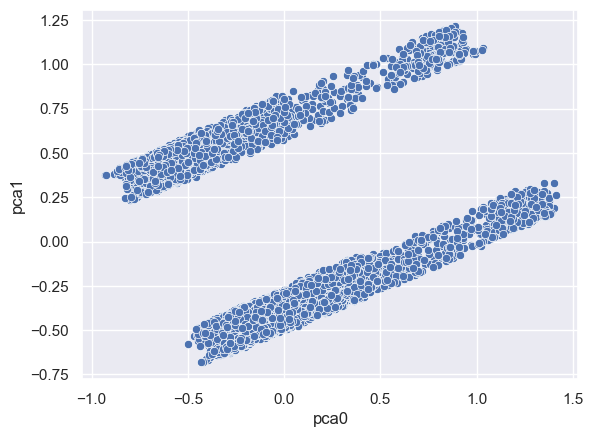

In [76]:
sns.scatterplot(data=pca_variance_df,x=pca_variance_df['pca0'],y=pca_variance_df['pca1'])

In [78]:
kmean_1 = KMeans(n_clusters=46,
      random_state=seed,
      n_init = "auto",)
kmean_one = kmean_1.fit_predict(pca_variance_df[["pca0","pca1"]])

In [79]:
pca_variance_df["class"]=kmean_one

In [80]:
pca_variance_df.head()

pca0  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                     -0.095853   
Saudade De Bahia                               ... Antônio Carlos Jobim                             -0.016274   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.125222   
Mulher Eu Sei                                  ... Chico César                                       0.506225   
Rosa Morena                                    ... Kurt Elling                                       0.543287   

                                                                                                         pca1  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.757760   
Saudade De Bahia                               ... Antônio Carlos Jobim                             -0.452885   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                 -0.504089   
Mulher Eu Sei                                  ... Chico César                                      -0.182971   
Rosa Morena                                    ... Kurt Elling                                      -0.130601   

                                                                                                     class  
name                                               artist                                                   
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                         35  
Saudade De Bahia                               ... Antônio Carlos Jobim                                 28  
Canta Canta, Minha Gente                       ... Martinho Da Vila                                      1  
Mulher Eu Sei                                  ... Chico César                                          36  
Rosa Morena                                    ... Kurt Elling                                          23

<Axes: xlabel='pca0', ylabel='pca1'>

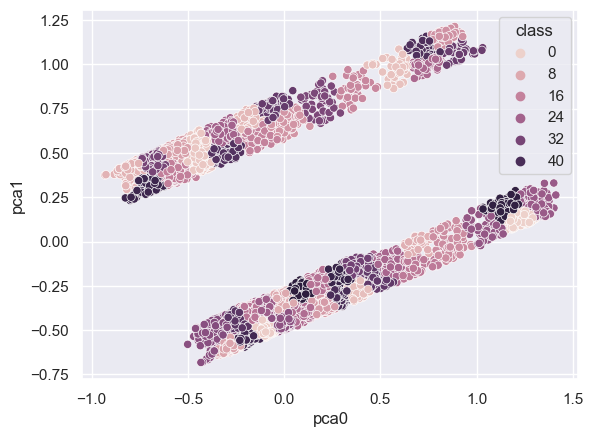

In [81]:
sns.scatterplot(data=pca_variance_df,x=pca_variance_df['pca0'],y=pca_variance_df['pca1'], hue=pca_variance_df['class'])

In [339]:
df_filtered

speechiness  \
name                                               artist                                                          
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                         0.076797   
Saudade De Bahia                               ... Antônio Carlos Jobim                                 0.037691   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                     0.377996   
Mulher Eu Sei                                  ... Chico César                                          0.051307   
Rosa Morena                                    ... Kurt Elling                                          0.041394   
...                                                                                                          ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                             0.051525   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                       0.048148   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                    0.047277   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                       0.045643   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                        0.035185   

                                                                                                     liveness  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.987842   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.108409   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.125633   
Mulher Eu Sei                                  ... Chico César                                       0.391084   
Rosa Morena                                    ... Kurt Elling                                       0.105370   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.084296   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.070314   
Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 ... Arnold Schoenberg                                 0.078217   
Serenade For Strings In E, Op.22, B. 52: 1. Mod... Antonín Dvořák                                    0.112462   
Ravel: Boléro, M. 81                           ... Maurice Ravel                                     0.287741   

                                                                                                        tempo  \
name                                               artist                                                       
Se Eu Quiser Falar Com Deus                    ... Gilberto Gil                                      0.515800   
Saudade De Bahia                               ... Antônio Carlos Jobim                              0.584322   
Canta Canta, Minha Gente                       ... Martinho Da Vila                                  0.437862   
Mulher Eu Sei                                  ... Chico César                                       0.499098   
Rosa Morena                                    ... Kurt Elling                                       0.565171   
...                                                                                                       ...   
1812 Festival Overture, Op. 49: 1812 Overture, ... Pyotr Ilyich Tchaikovsky                          0.410795   
Winter Fragments pour ensemble instrumental, so... Tristan Murail                                    0.38

In [311]:
df_spotify = pd.read_csv('/Users/samaardi/Desktop/WBS-Data Science Bootcamp/unsupervised machine learning/3_spotify_5000_songs.csv')

In [314]:
df_spotify.columns = df_spotify.columns.str.strip()

In [334]:
id_df = df_spotify[['id', 'speechiness']]
id_df

id  speechiness
0     1n7JnwviZ7zf0LR1tcGFq7        0.0705
1     5QGM1U0eCYrQuwSJwTm5Zq        0.0346
2     0NLIFSZxPzQhCwnkn5PJYs        0.3470
3     3mXqOdlLE1k67WsAxryPFs        0.0471
4     7bSzjzjTkWT2CkIPPdp0eA        0.0380
...                       ...          ...
5230  1aEhYlZtypmipA06SDJ4U3        0.0473
5231  1Gfqe7TAKklmuZf6hxsH6h        0.0442
5232  2XNwnFrdMDpismp0VUZ7cU        0.0434
5233  7ucDwgMtE3YJtEfTbuRhy0        0.0419
5234  7E1ErYYCn0lYjHODZ1qGuB        0.0323

[5235 rows x 2 columns]

In [337]:
pd.merge(id_df, df_filtered, how='inner', on='speechiness')

id  speechiness  liveness     tempo  time_signature  \
0   4NSW0Km5ZG60L8FthUebPJ          0.05  0.058764  0.673013             0.8   
1   4NSW0Km5ZG60L8FthUebPJ          0.05  0.144883  0.534235             0.8   
2   4NSW0Km5ZG60L8FthUebPJ          0.05  0.442756  0.615519             0.8   
3   4NSW0Km5ZG60L8FthUebPJ          0.05  0.142857  0.695523             0.8   
4   4NSW0Km5ZG60L8FthUebPJ          0.05  0.186424  0.560797             0.8   
..                      ...          ...       ...       ...             ...   
72  1CcS1yrulOFPXYk7NVKAm2          0.05  0.130699  0.653334             0.8   
73  1CcS1yrulOFPXYk7NVKAm2          0.05  0.103343  0.356947             0.8   
74  1CcS1yrulOFPXYk7NVKAm2          0.05  0.097366  0.565386             0.8   
75  1CcS1yrulOFPXYk7NVKAm2          0.05  0.194529  0.454708             0.8   
76  1CcS1yrulOFPXYk7NVKAm2          0.05  0.483283  0.443997             0.8   

    acoustic_loudness_energy  danceability_valence  cluster  
0                  -0.421383              0.254633       10  
1                  -0.395904              0.501450       36  
2                   0.235955              0.233278       38  
3                   0.055872              0.154757       34  
4                  -0.312075              0.093609        2  
..                       ...                   ...      ...  
72                  0.851302             -0.266093       21  
73                  1.014037             -0.245929       15  
74                 -0.292563              0.269216       10  
75                 -0.434511             -0.276001       22  
76                 -0.419665             -0.245926       14  

[77 rows x 8 columns]

In [326]:
df_spotify['cluster'] = fitted_best_kmean.labels_

ValueError: Length of values (5234) does not match length of index (5235)

In [332]:
df_spotify_final = df_spotify.loc[~(df_spotify == 0).all(axis=1)]

In [333]:
df_spotify_final.shape

(5235, 18)

In [330]:
df_spotify.columns

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')

In [331]:
df_spotify.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_spotify.drop(columns=['type'], inplace=True)

In [338]:
df_spotify.set_index('name', 'artist')

name  \
0     Se Eu Quiser Falar Com Deus                   ...   
1     Saudade De Bahia                              ...   
2     Canta Canta, Minha Gente                      ...   
3     Mulher Eu Sei                                 ...   
4     Rosa Morena                                   ...   
...                                                 ...   
5230  1812 Festival Overture, Op. 49: 1812 Overture,...   
5231  Winter Fragments pour ensemble instrumental, s...   
5232  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...   
5233  Serenade For Strings In E, Op.22, B. 52: 1. Mo...   
5234  Ravel: Boléro, M. 81                          ...   

                                                artist  danceability   energy  \
0     Gilberto Gil                                            0.6580  0.25900   
1     Antônio Carlos Jobim                                    0.7420  0.39900   
2     Martinho Da Vila                                        0.8510  0.73000   
3     Chico César                                             0.7050  0.05020   
4     Kurt Elling                                             0.6510  0.11900   
...                                                ...           ...      ...   
5230  Pyotr Ilyich Tchaikovsky                                0.2020  0.06940   
5231  Tristan Murail                                          0.1880  0.10100   
5232  Arnold Schoenberg                                       0.0596  0.00093   
5233  Antonín Dvořák                                          0.1330  0.02080   
5234  Maurice Ravel                                           0.3540  0.04870   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0      11   -13.141     0       0.0705         0.694          0.000059   
1       2   -12.646     1       0.0346         0.217          0.000002   
2       2   -11.048     1       0.3470         0.453          0.000063   
3       4   -18.115     1       0.0471         0.879          0.000041   
4       6   -19.807     1       0.0380         0.916          0.000343   
...   ...       ...   ...          ...           ...               ...   
5230    3   -23.390     1       0.0473         0.917          0.715000   
5231    6   -21.873     1       0.0442         0.855          0.426000   
5232    9   -42.959     1       0.0434         0.951          0.969000   
5233    4   -29.443     1       0.0419         0.883          0.505000   
5234    5   -24.568     1       0.0323         0.783          0.484000   

      liveness  valence    tempo   type  duration_ms  time_signature  \
0       0.9750   0.3060  110.376              256213               4   
1       0.1070   0.6930  125.039              191867               4   
2       0.1240   0.9050   93.698              152267               4   
3       0.3860   0.5240  106.802              186227               4   
4       0.1040   0.4020  120.941              273680               4   
...        ...      ...      ...    ...          ...             ...   
5230    0.0832   0.0655   87.906              995000               4   
5231    0.0694   0.0355   83.134              855000               4   
5232    0.0772   0.0344   71.573              238187               3   
5233    0.1110   0.0591   67.109              314307               4   
5234    0.2840   0.2530   64.120              948787               3   

                           id  \
0     1n7JnwviZ7zf0LR1tcGFq7    
1     5QGM1U0eCYrQuwSJwTm5Zq    
2     0NLIFSZxPzQhCwnkn5PJYs    
3     3mXqOdlLE1k67WsAxryPFs    
4     7bSzjzjTkWT2CkIPPdp0eA    
...                       ...   
5230  1aEhYlZtypmipA06SDJ4U3    
5231  1Gfqe7TAKklmuZf6hxsH6h    
5232  2XNwnFrdMDpismp0VUZ7cU    
5233  7ucDwgMtE3YJtEfTbuRhy0    
5234  7E1ErYYCn0lYjHODZ1qGuB    

                                                   html  
0     https://open.spotify.com/track/1n7JnwviZ7zf0LR...  
1     https://open.spotify.com/track/5QGM1U0eCYrQuwS...  
2     https://open.spotify.com/track/0NLIFSZ